# **Tutorial Two: Extracting and Analyzing Sleep Data**

In research, data is often extracted from various programs that record different parameters, such as EEG, EMG, heart rate, calcium signals, or locomotor activity. These recordings can usually be saved as spreadsheets or Excel files, which can then be conveniently used for analysis.

In this tutorial, you will learn how to **load, view, and store your data using Python**.
This is one of the key steps in automating your data pipeline, especially when working with multiple trials or animals.




Similarly to the previous tutorial, we will take advantage of some premade libraries that allow us to manipulate and work with our data more efficiently!

In today’s tutorial, we will be working with a dataset in Excel format that contains sleep–wake architecture data. The data includes different sleep–wake states: **NR (Non-Rapid Eye Movement Sleep), R (Rapid Eye Movement Sleep), QW (Quiet Wakefulness), and AW (Active Wakefulness)**. The recordings were collected over a 3-hour period when mice are mostly asleep, and are expressed in 5-second epochs (or 5-second intervals).

If you download the Excel file to your computer, you will notice that each sheet is labeled as either WT or KO. These correspond to two groups of mice:

**KO (Orexin Knockout)**: mice that lack the orexin peptide, a key wake-promoting molecule. These mice are exceptionally sleepy, have difficulty staying awake, and also experience fragmented, poor-quality sleep.

**WT (Wildtype)**: mice with an intact orexin gene, which show normal sleep–wake patterns.

***The goal of our analysis is to determine whether narcoleptic mice (KO) differ in their sleep compared to their WT littermates.***

We will also use this dataset as an example in subsequent tutorials, where you will learn how to perform statistical analyses and graph your own data.

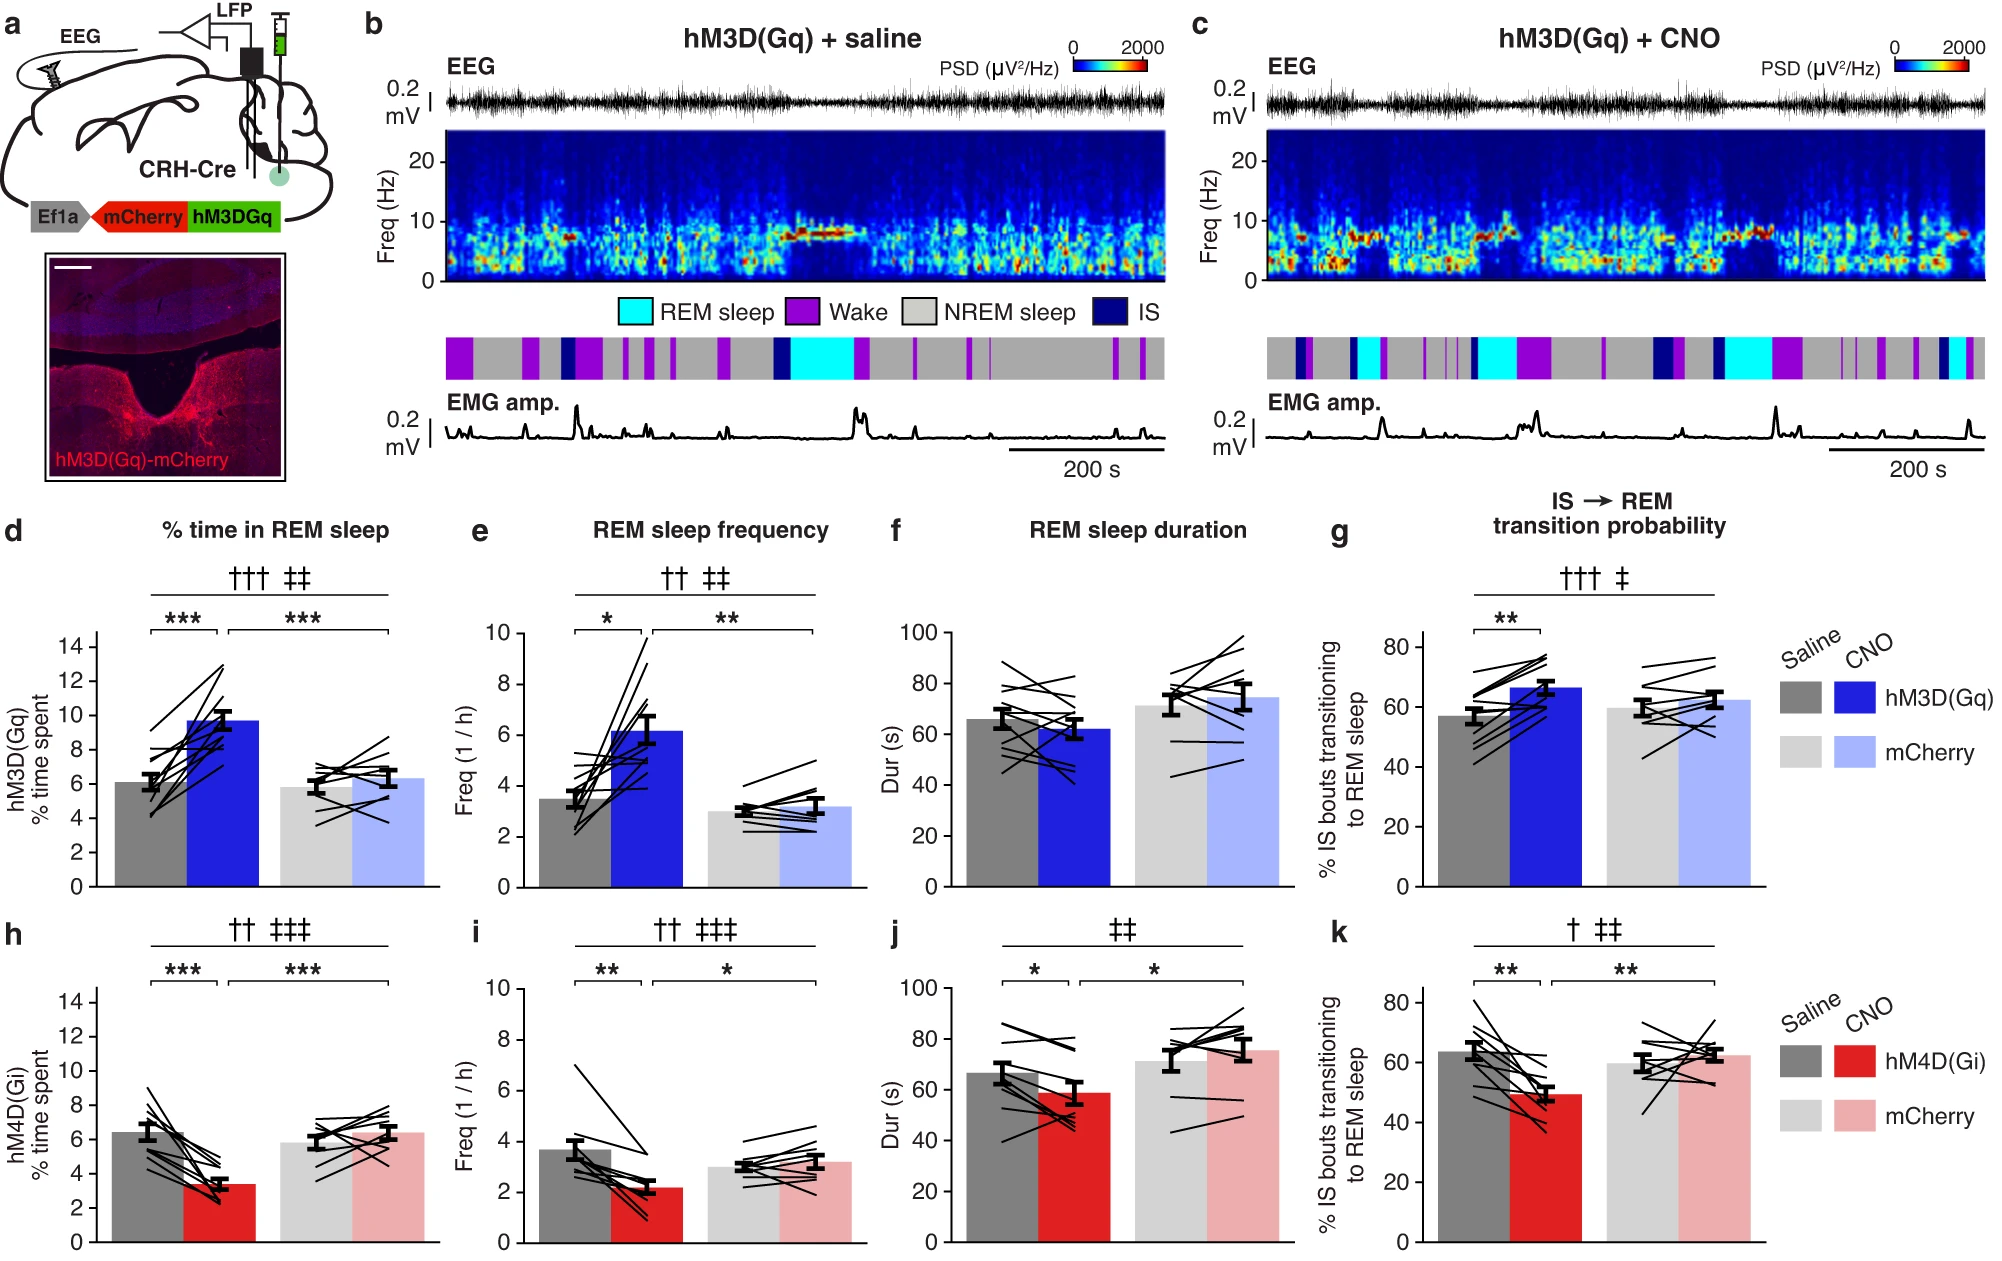

Figure Panel is from Schott et al, 2023 


# **Importing the Spreadsheet with data into Python.**

Luckily for us, there are premade libraries that make it easy to load and explore your data, such as:

# **Pandas! 🐼***
This open-source library was specifically designed for manipulating datasets. It contains many powerful functions for working with text files, CSVs, and Excel sheets (well beyond what we will cover in today’s tutorial). You can always look up additional functions online later if you want to explore further.


In [ ]:
#Loading Necessary Packages
# This is used to access Python interactive environment. This way we can feed input and receive output as we code.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd #this package will be used for managing dataframes and excel sheets
import numpy as np  #this package will be used to perform math functions

**Quick tips (Jupyter):**

Press **Tab after pd. to see pandas functions**, or after an object like xls. to see its methods (e.g., .sheet_names, .parse).

Use **pd.read_excel? (or help(pd.read_excel))** to pop up the docstring with all parameters that we can use.

In [ ]:
help(pd...)

In [ ]:
# load the Excel file  
pd.ExcelFile("..")  

sleep_wake_states = pd...("..") #saving excel file as a variable

# See all sheet names (e.g., WT or KO)  
print(sleep_wake_states...)  

In [ ]:
# Load one sheet 
pd.read_excel(..., "315 ko")  

#Or load all sheets
pd.read_excel(sleep_wake_states, sheet_name= ...)

In [ ]:
# Look at the first 5 rows  
pd.read_excel("narcoleptic_vs_wt_mice_data.xlsx")...

It’s important to remember that you need to save your data as a variable!
If you only call the read_excel function without assigning it to a variable, you will see the output once, but you won’t be able to manipulate or reuse it later in your analysis.

**In Python, any data, object, or result that you want to access again must be stored in a variable.** 

For example:

In [ ]:
# This will display the sheet but won’t save it
pd.read_excel("narcoleptic_vs_wt_mice_data.xlsx", sheet_name = None)

# This saves the data as a variable 
sleep_wake_architecture = pd.read_excel("narcoleptic_vs_wt_mice_data.xlsx", sheet_name= None)

In [ ]:
#Look at the type of variable we are working with: 
type(...)

# **Dictionaries**

You will notice that when Python loads your Excel file, it saves it as a collection called a dictionary.

Dictionaries are very useful for analysis because they store information as key:value pairs.

- The key is the label or name (for example, "Mouse1", "Trial1")

- The value is the data associated with that label (for example, the sleep states for Mouse1)

This structure is powerful when you have repetitive or grouped data, such as multiple mice or trials. 


Most importantly:

You can use the same manipulations on dictionaries as you did on lists, such as for loops and if statements.

**The only difference is that in a dictionary, you need to assign two temporary variables in your loop: one for the key and one for the value.**

For example: 

In [ ]:
for ..., ... in sleep_wake_architecture.items(): #go over your sleep-wake architecture dictionary
    print(..., len(...)) #print key name (our sheet name) and number of epochs


# **Manipulating Your Saved Excel Sheet: Cleaning Up Data**

When you load your Excel sheet, you may notice that it contains two columns:

- The state names (NR, R, QW, AW)
- The codes that were automatically generated by the recording program.


For our analysis, we only need the contents from **Column A (the state names)**. 
To do this, we can use another very useful Pandas function: **.iloc**.

**.iloc** allows you to access specific rows and columns from your dataset by their index positions.

For example: 
- **.iloc[0,:]**: will give access to a whole row

- **.iloc[:,0]**: will give access to a whole column

- **.iloc[,1:4]**: slice of a column

**❗ In Python, "index" refers to the position of an element within an ordered sequence. All indexes start at 0!** 

Source to read more about it: https://www.datacamp.com/tutorial/loc-vs-iloc

In [ ]:
sleep_wake_architecture_dictionary = {} #creating empty dictionary 

#mouseID goes through keys of an original dictionary
#SWstate goes through sleep-wake state data for user and software
#iloc method: we use multi-indexing technique to access all values from column 1 

for mouseID, SWstates in sleep_wake_architecture.items():
    sleep_wake_architecture_dictionary[mouseID] = SWstates...[...,...]

sleep_wake_architecture_dictionary

# **Cleaning Up the Dictionary**

Now, we have our dictionary with **mouse IDs as keys and sleep–wake state names as values**.

To make sure we only analyze the states we are interested in, we should clean up the dictionary so that it only keeps data labeled as:

- NR (Non-REM sleep)

- R (REM sleep)

- AW (Active Wakefulness)

- QW (Quiet Wakefulness)



In [ ]:
# Create an empty dictionary
sleep_wake_architecture_dictionary_STATES_only = {}

# Go through each mouse and its states
for mouseID, SWstates in sleep_wake_architecture_dictionary.items():
    # Keep only the states we care about
    cleaned_states = []
    for ... in SWstates:
        if ... in ["NR", "R", "QW", "AW"]:
            cleaned_states...(state) #function that can be used to add values to a dictionary or list

    # Save the cleaned list into the new dictionary
    sleep_wake_architecture_dictionary_STATES_only[mouseID] = ...

sleep_wake_architecture_dictionary_STATES_only

# **Manipulating your saved excel sheet: Time Spent in Each State**

In addition to what we’ve covered so far, let’s take a moment to recap some of the key concepts from the previous tutorial: 


In [ ]:
sleep_wake_amounts_per_mouse = {} #create empty dictionary 
for mouseID, SWstates in sleep_wake_architecture_dictionary_STATES_only.items(): #iterate through dictionary
    NR_count = 0 #create a counter for each state
    R_count = 0
    WAKE_count = 0
    for state in SWstates: #iterate through each state 
        if state == "...": #check if a state == NR
            NR_count += 1 #update counter
        elif  state == "...": #check if a state == R
            R_count += 1 #update counter
        elif state == "..." or state == "...": #check if a state == WAKE
            WAKE_count += 1 #update counter
    #update new dictionary with ID and count of states for each mouse
    sleep_wake_amounts_per_mouse[mouseID] = {"NR": ..., "R": ..., "WAKE": ...} 

In [ ]:
sleep_wake_amounts_per_mouse

With this code, we created what is called a **nested dictionary**. Essentially, it is a dictionary inside another dictionary.

In this structure:

- Each mouse ID (the outer key) points to its own dictionary.

- Inside that inner dictionary (outer value), each state (NR, R, QW, AW) is a key.

- The value for each state is the number of entries (or counts) for that state.

# **Creating a DataFrame** 

Dictionaries and arrays are powerful, but they are not always as easy to read or interpret as an Excel sheet. 

Luckily, Python (through the Pandas library) Python has a solution for that: DataFrame

A **DataFrame** is essentially a table-like structure that looks and behaves very much like a spreadsheet:

- Rows = observations (e.g., time points, trials, or mice)

- Columns = variables (e.g., states, counts, signals)

Or whatever you want it to be! 

This makes your data easier to inspect, clean, and analyze.

In [ ]:
#sleep_wake_df stands for sleep-wake data frame
sleep_wake_df = pd...(sleep_wake_amounts_per_mouse)
sleep_wake_df

You can see that this format gives you a much more readable output:

- Each column represents an individual animal ID.
- Each row represents the number of entries for each sleep–wake state (NR, R, W).

# **Manipulating your Dataframe: Percent time Spent in Each State**

As with any data type, you can also perform math operations on your DataFrame (as long as the values are numbers, of course!). This allows you to quickly calculate sums, averages, or other statistics across rows or columns.



# **Comprehension Question:** 

Given that we want to calculate sleep–wake amounts for a 3-hour period (2159 epochs), calculate the percent time spent in each state (NR, R, and WAKE) per animal using the concepts you learned so far.

In [ ]:
#Answer


Keep in mind that some animals may have fewer than 2159 epochs recorded, so make sure to adjust your calculation based on the actual number of epochs for each animal.

In [ ]:
for mouseID, SWstates in sleep_wake_architecture_dictionary_STATES_only.items(): #go over your sleep-wake architecture dictionary
    print(mouseID, len(SWstates)) #print key name (our sheet name) and number of epochs


# **Manipulating your Dataframe: Adding a SUM Row with Loc**

And if you look closely at the Excel sheet, you’ll notice something important: in addition to NR, R, QW, and AW (which we combined into WAKE), narcoleptic mice sometimes have an extra state called SA (Sleep Attack).

To make sure we use the appropriate epoch amounts, we can create a new row called SUM that will contain the total number of epochs (NR + R + WAKE) for each mouse. This way, every mouse’s total reflects the exact number of epochs recorded in their session.

To do that we can use a **.loc** function. Essentially, this function is similar to **.iloc** that was presented before. **The difference is it access data by label (for example, name of the column or row) instead of a position.**

In [ ]:
sleep_wake_df...["SUM"] = sleep_wake_df...["..."] + sleep_wake_df....["..."] + sleep_wake_df....["..."]
sleep_wake_df

In [ ]:
percent_df = sleep_wake_df...[["NR","R","WAKE"]] / sleep_wake_df.loc["SUM"] * 100
percent_df

# **Manipulating your DataFrame: Transpose Function** 

Sometimes the way your data is displayed in a DataFrame may not be the most convenient for analysis. For example, you might have mice as columns and states as rows, but you’d prefer to flip it so that mice are rows and states are columns (or the other way around).

In [ ]:
percent_df_transposed = percent_df...()
percent_df_transposed

# **Comprehension Question: Calculating Total Sleep**

# **Manipulating your Dataframe: Loc Function**

If you remember, at the beginning of the tutorial I mentioned that each mouse is labeled as WT or KO. These labels correspond to two groups of mice:

- **KO (Knockout)**: narcoleptic mice that are missing orexin and therefore show symptoms of excessive sleepiness and fragmented sleep.

- **WT (Wildtype)**: control mice with normal orexin signaling and regular sleep patterns.

From a first glance at the DataFrame, it is not always obvious which group each mouse belongs to. To improve readability, we can create a new column in our DataFrame that explicitly states whether each mouse is WT or KO.

In [ ]:
#iterate through index (where mouse id is stored) of the data frame
for ... in percent_df_transposed.index:
    if "wt" in ...: #check if mouseID contains group identification
        #assigns group value for each mouse individually
        percent_df_transposed...[..., "Group"] = "Wild-Type"
    elif "ko" in mouseID: #check if mouseID contains group identification
        #assigns group value for each mouse individually
        percent_df_transposed...[..., "Group"] = "Narcoleptic"

percent_df_transposed

Lastly, you may notice that the column with animal IDs is currently used as row labels (indexes), rather than being stored as a separate column with IDs as data points.

We can easily fix this by resetting the index, which moves the row labels into their own column. This way, each mouse ID will appear as a regular column in the DataFrame, making it easier to access and manipulate.

In [ ]:
percent_df_with_group_names = percent_df_transposed...()
percent_df_with_group_names


In [ ]:
#rename the index column as it's now a mouseID column
percent_df_with_group_names...(columns = {"...": "mouseID"}, inplace = ...)
percent_df_with_group_names

# **Summarizing and Manipulating Group Data** 

I hope you can see now that the data looks more readable and organized. This is really important becayse **if your data or your code is messy, it becomes much harder to use later for meaningful analysis, both for yourself and for your colleagues.**

Another major advantage of keeping your DataFrames clean is that Python provides an abundance of built-in functions that make it easy to summarize and manipulate your data.

Some useful examples include (but are not limited to):

- **query()**:filter your DataFrame by specific criteria (e.g., select only WT or KO mice).

- **groupby()**: group your data by experimental group (e.g., WT vs KO) to compare them easily.

- **aggregate()**: apply multiple math functions (like mean, min, max) at once to summarize columns.

In [ ]:
# filter by mouseID
summary_exp_df = (percent_df_with_group_names...('Group in ["Wild-Type", "Narcoleptic", "mouseID"]')

                    # Group by Experimental vs Control Group
                    .groupby(by = ['...'])

                    # Create a table of mean, min, max of each state
                    # ['NR', 'R', "WAKE"]
                    .agg({'..':["..", "..", "..", ".."], 'R': ["mean", "min", "max", "std"], 'WAKE': ["mean", "min", "max", "std"], 'Total Sleep':["mean", "min", "max", "std"]})

                    # Reset Indexes
                    .reset_index()

                    # Set Group as a category 
                    .astype({'Group':'category'}) #convert group column as a diff data type 
)

# Check summarized data
summary_exp_df

# Subsetting a Column

If you are only interested in a few of these parameters, you can create a subset of your DataFrame that keeps just the columns you need. This is useful for making the table easier to read or for focusing only on the values you plan to analyze.

In [ ]:
subset_of_sum = summary_exp_df[[('Group','') , ('..','..'), ('..','..')]]
subset_of_sum

# **Additional Useful Functions:**

- **ShortCut .describe()**: gives you a quick statistical summary for every column of your DataFrame.

In [ ]:
percent_df_transposed.describe() 
percent_df_with_group_names.isnull().sum()
percent_df_with_group_names.sort_values(by="WAKE")


- **isnull()**: checks if you have any missing values (NaN) in your DataFrame.

In [ ]:
percent_df_with_group_names.isnull()
#or 
percent_df_with_group_names.isnull().sum()

- **.sort_values:*** reorders your rows by the values in the "chosen" column. (usually, from smallest to largest)

In [ ]:
percent_df_with_group_names.sort_values(by="..")

# **Conclusions:**

- It is very important to clean your dataset as much as possible before moving on to further analysis. Messy data leads to messy results.

- Dictionaries and DataFrames are powerful tools in Python for storing, organizing, and manipulating large datasets efficiently.

- When you work on your assignments, keep in mind that chances are someone has already developed a function or library that you can reuse — **don’t reinvent the wheel**!

- Always create informative names for your variables and DataFrames, and annotate your code with comments so it’s clear to you and others later on.